In [ ]:
!pip install wandb

In [ ]:
import wandb

In [ ]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cs24m015 (cs24m015-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
# Initialize a new wandb run
wandb.init(project='DL_A1')

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist

wandb.init(project='DL_A1')

(x_train, y_train), _ = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
columns = ["Index", "Label", "Image"]
table = wandb.Table(columns=columns)
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    image = x_train[idx]
    table.add_data(idx, class_names[i], wandb.Image(image)) # Adding data to the table
wandb.log({"DL_A1": table})
wandb.finish()

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


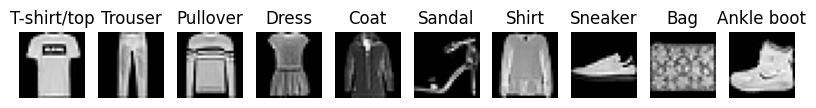

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(10, 10))

for i in range(num_classes):
    idx = np.where(y_train == i)[0][0]  # first image
    ax = axes[i]
    ax.imshow(x_train[idx], cmap='gray')  # grayscale
    ax.set_title(class_names[i])
    ax.axis('off')
plt.show()

In [ ]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

import numpy as np
class_examples = np.zeros((10, 28, 28), dtype=np.uint8)
found_classes = set()

for img, label in zip(X_train, y_train):
    if label not in found_classes:
        class_examples[label] = img
        found_classes.add(label)
    if len(found_classes) == 10:
        break


import wandb

wandb.init(project='DL_A1')
wandb.log({"Examples": [wandb.Image(img, caption=f"Class {i}") for i, img in enumerate(class_examples)]})


In [ ]:
# try2

import wandb
import numpy as np
from keras.datasets import fashion_mnist

categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

wandb.init(project='DL_A1')

class_examples = np.zeros((10, 28, 28), dtype=np.uint8)
example_indices = np.zeros(10, dtype=int)
found_classes = set()

for idx, (img, label) in enumerate(zip(X_train, y_train)):
    if label not in found_classes:
        class_examples[label] = img
        example_indices[label] = idx
        found_classes.add(label)
    if len(found_classes) == 10:
        break

wandb.log({"Examples": [wandb.Image(class_examples[i],
                                    caption=f"{categories[i]}")
                        for i in range(10)]})


In [33]:
# try 3

import wandb

wandb.init(project="DL_A1", name="fashion_mnist_tracking", mode="online")

class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

num_images = 10  # 10, since we need to generate 10 images
images_to_log = []

for step in range(num_images):
    index = step % len(X_train)
    img = X_train[index]  # fetching the image
    label = class_names[y_train[index]]
    img_rgb = np.stack([img] * 3, axis=-1)

    # Append images to list
    images_to_log.append(wandb.Image(img_rgb, caption=f"{label}"))

# Log all images at once
wandb.log({"DL_A1": images_to_log})

wandb.finish()

In [2]:
#try 4 - with step but without index
import wandb
import numpy as np
from keras.datasets import fashion_mnist

(X_train, y_train), _ = fashion_mnist.load_data()
wandb.init(project="DL_A1", name="fashion_mnist_samples", mode="online")

class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

steps = 3  # Number of steps (#steps-1)
images_per_step = 10  # Number of images per step

for step in range(steps):
    images_to_log = []
    for i in range(images_per_step):
        index = (step * images_per_step + i) % len(X_train)
        img = X_train[index]  # fetching the image
        label = class_names[y_train[index]]
        img_rgb = np.stack([img] * 3, axis=-1)

        #images_to_log.append(wandb.Image(img_rgb, caption=f"{label} - Step {step} Index {i}"))
        images_to_log.append(wandb.Image(img_rgb, caption=f"{label}"))

    wandb.log({"DL_A1": images_to_log}, step=step)

wandb.finish()
